In [1]:
# import the packages
# read the data
# divide into cat num coumns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path='Visadataset.csv'
visa_df=pd.read_csv(path)
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

## prevailing_wage

- len

- max

- min

- mean

- median

- 25percentile

- 50percentile

- 75percentile

In [3]:
wage_data=visa_df['prevailing_wage']
len(wage_data)

25480

In [4]:
min(wage_data)

2.1367

In [5]:
wage_data.min()

2.1367

In [6]:
np.min(wage_data)

2.1367

In [7]:
wage_data=visa_df['prevailing_wage']
min(wage_data),wage_data.min(),np.min(wage_data)

(2.1367, 2.1367, 2.1367)

In [8]:
wage_data.mean()

np.float64(74455.81459209183)

In [9]:
np.mean(wage_data)

np.float64(74455.81459209183)

In [10]:
wage_data.median()

70308.20999999999

In [11]:
np.median(wage_data)

np.float64(70308.20999999999)

In [12]:
max(wage_data)

319210.27

In [13]:
wage_data.max()

319210.27

In [14]:
np.max(wage_data)

319210.27

**Qunatile-percentile**

In [15]:
p_25=np.percentile(wage_data,25)
p_25

np.float64(34015.479999999996)

In [16]:
p_50=np.percentile(wage_data,50)
p_50

np.float64(70308.20999999999)

In [17]:
p_75=np.percentile(wage_data,75)
p_75

np.float64(107735.51250000001)

In [18]:
q_25=np.quantile(wage_data,0.25)
q_50=np.quantile(wage_data,0.50)
q_75=np.quantile(wage_data,0.75)
print(f'q_25:-{q_25},q_50:-{q_50},q_75:-{q_75}')

q_25:-34015.479999999996,q_50:-70308.20999999999,q_75:-107735.51250000001


In [19]:
wage_data=visa_df['prevailing_wage']
wage_count=round(len(wage_data),2)
wage_min=round(wage_data.min(),2)
wage_mean=round(np.mean(wage_data),2)
wage_median=round(np.median(wage_data),2)
wage_p25=round(np.percentile(wage_data,25),2)
wage_p50=round(np.percentile(wage_data,50),2)
wage_p75=round(np.percentile(wage_data,75),2)
wage_max=round(np.max(wage_data),2)
l=[wage_count,wage_min,wage_mean,wage_median,wage_p25,wage_p50,wage_p75,wage_max]
Id=['Count','Min','Mean','Median','p25','p50','p75','Max']

pd.DataFrame(l,columns=['prevailing_wage'],index=Id)

,prevailing_wage
Count,25480.00
Min,2.14
Mean,74455.81
Median,70308.21
p25,34015.48
p50,70308.21
p75,107735.51
Max,319210.27


In [20]:
L=[]
for i in num:
    data=visa_df[i]
    Count=round(len(data),2)
    Min=round(data.min(),2)
    Mean=round(np.mean(data),2)
    Median=round(np.median(data),2)
    p_25=round(np.percentile(data,25),2)
    p_50=round(np.percentile(data,50),2)
    p_75=round(np.percentile(data,75),2)
    Max=round(data.max(),2)
    l=[Count,Min,Mean,Median,p_25,p_50,p_75,Max]
    Id=['Count','Min','Mean','Median','p_25','p_50','p_75','Max']
    L.append(l)

pd.DataFrame(L,columns=Id)



,Count,Min,Mean,Median,p_25,p_50,p_75,Max
0,25480,-26.00,5667.04,2109.00,1022.00,2109.00,3504.00,602069.00
1,25480,1800.00,1979.41,1997.00,1976.00,1997.00,2005.00,2016.00
2,25480,2.14,74455.81,70308.21,34015.48,70308.21,107735.51,319210.27


In [21]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**percentile concenpt**- 

- 25p: 25percentage of data below 25p value

- wage_25p: 34015.48

   - There 25*(25480)/100=6370 applicants have salary less than 34015

- wage_50p: 70308.12

   - There 50*(25480)/100=12740

- wage_75p: 107735.51

   - There 75*(25480)/100=19110 applicants have salary less than 107735.51

In [22]:
cond=visa_df['prevailing_wage']<wage_p25
len(visa_df[cond])==len(visa_df)*25/100

True

In [23]:
len(visa_df[cond])

6370

In [24]:
# **Emperical rule**
# u-1*sigma to u+1*sigma 68%
# step-1: wage data mean (u)
# step-2: wage data std (sigma)
# step-3: LB=u-1*sigma
# step-4: UB=u+1*sigma
# step-5: con1=visa_df['prevailing_wage']>LB
# step-6: con2=visa_df['prevailing_wage']<UB
# step-7: con=con1 & con2
# step-8: len(visa_df[con])

In [25]:
wage_data=visa_df['prevailing_wage']
U=wage_data.mean()
sigma=wage_data.std()
LB=U-1*sigma
UB=U+1*sigma
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
con=con1 & con2
len(visa_df[con])

17171

**Conclusion:** Emperical rule failed wage data does not following Normal distribution

### Histogram

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

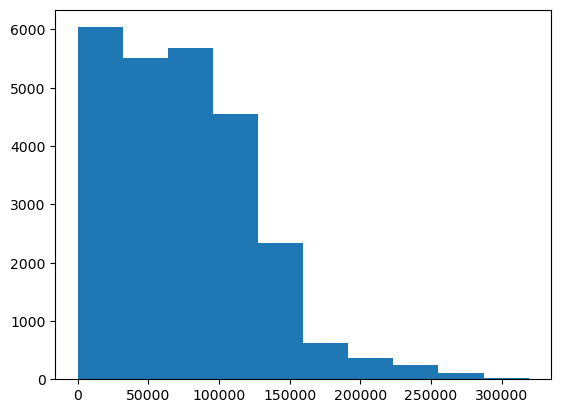

In [26]:
plt.hist(wage_data)

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

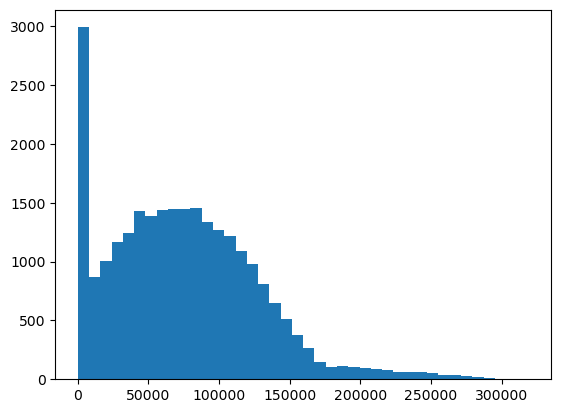

In [27]:
plt.hist(wage_data,bins=40)

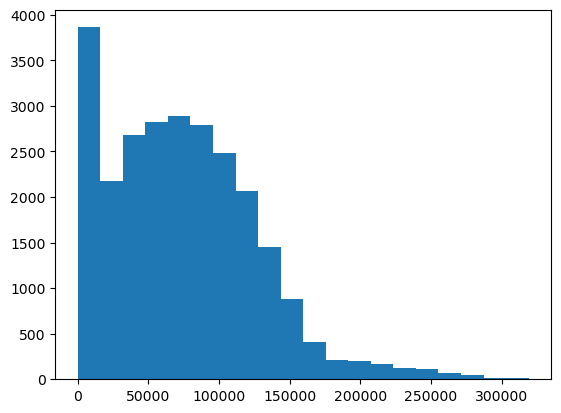

In [28]:
interval_count,interval_values,n=plt.hist(wage_data,bins=20)

In [29]:
interval_count

array([3863., 2175., 2676., 2828., 2889., 2792., 2485., 2066., 1452.,
        882.,  408.,  216.,  206.,  167.,  129.,  111.,   66.,   48.,
         10.,   11.])

In [30]:
interval_values

array([2.13670000e+00, 1.59625434e+04, 3.19229500e+04, 4.78833567e+04,
       6.38437634e+04, 7.98041700e+04, 9.57645767e+04, 1.11724983e+05,
       1.27685390e+05, 1.43645797e+05, 1.59606203e+05, 1.75566610e+05,
       1.91527017e+05, 2.07487423e+05, 2.23447830e+05, 2.39408237e+05,
       2.55368643e+05, 2.71329050e+05, 2.87289457e+05, 3.03249863e+05,
       3.19210270e+05])

In [31]:
wage_data=visa_df['prevailing_wage']
LB=2.13670000e+00
UB=3.19210270e+05
con1=wage_data>=LB
con2=wage_data<UB
con=con1 & con2
len(visa_df[con])

25479

**Outlier analysis**

- we understood emperical rule failed

- then we plotted histogram its slightly deviated

- So it indicated the data has Outliers

- Outliers can be show by **box plot**

## *boxplot*

<function matplotlib.pyplot.show(close=None, block=None)>

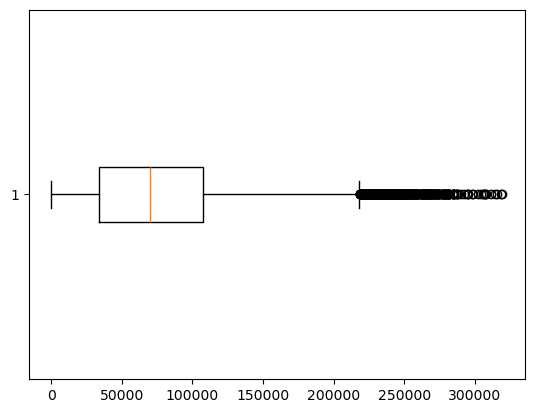

In [32]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

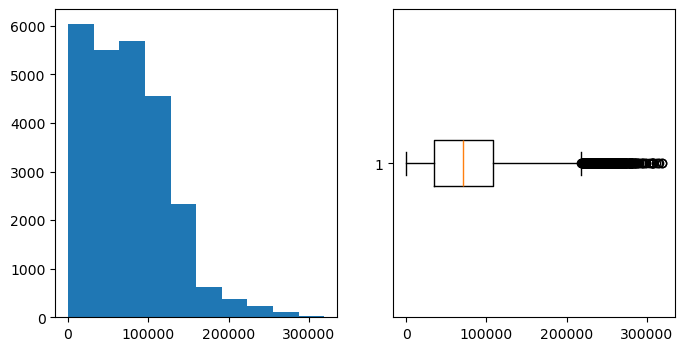

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.show

### Outliers  data

In [34]:
# q1
# q2
# q3
# IQR=q3-1.5
# UB=q3+1.5*IQR
# LBq3-1.5*IQR
# con1=wage>UB
# con2=wage<LB
# con=con1 | con2 outliers

# con1=wage<UB
# con2=wage>LB 
# con3= con1 & con2

In [35]:
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
UB=q3+1.5*IQR
LB=q3-q1*IQR
con1=wage_data>UB
con2=wage_data<LB
con=con1  |  con2
outliers_df=visa_df[con]
len(outliers_df)

427

In [36]:
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [37]:

q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
UB=q3+1.5*IQR
LB=q3-1.5*IQR
con1=wage_data<UB
con2=wage_data>LB
con= con1 & con2
non_outlier_df=len(visa_df[con])
non_outlier_df

25053

In [38]:
25053+427==25480

True

**fill the outliers**

- drop the outliers

- fill with median

- winsorization: fill with LB and UB

In [39]:
# Fill the outliers using median
outliers_df
outliers_df['prevailing_wage']
outliers_df['prevailing_wage'].values
outliers_df['prevailing_wage'].values.tolist()
l=[]
wage_data=visa_df['prevailing_wage']
wage_med=wage_data.median()
for value in wage_data:
    if value in outliers_df:
        l.append(wage_med)
    else:
        l.append(value)
visa_df['prevailing_wage1']=l
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage1
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,279174.7900
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


<function matplotlib.pyplot.show(close=None, block=None)>

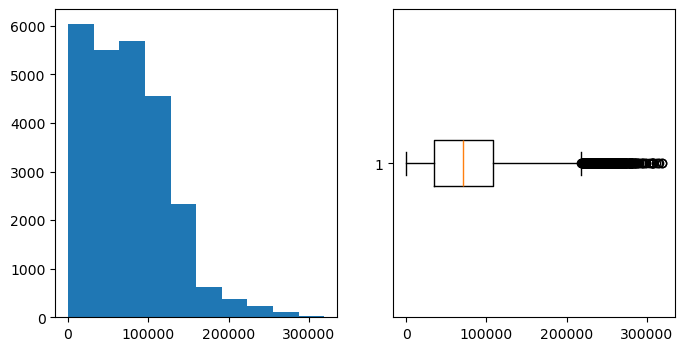

In [40]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x2592d49ca50>,
 'caps': [<matplotlib.lines.Line2D at 0x2592d49d6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2592d49fed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2592d49fc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2592d49fb10>],
 'means': []}

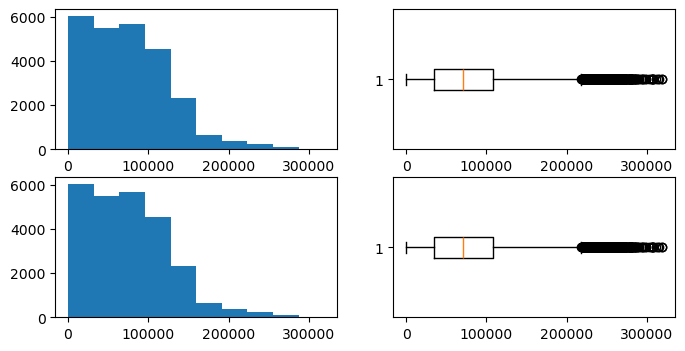

In [41]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage1'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage1'],vert=False)
plt.subplot(2,2,3).hist(wage_data)
plt.subplot(2,2,4).boxplot(wage_data,vert=False)

In [42]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
LB=q3-1.5*IQR
UB=q3+1.5*IQR
visa_df['prevailing_wage2']=wage_data.clip(lower=LB,upper=UB)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage1,prevailing_wage2
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029,592.20290
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500,83425.65000
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600,122996.86000
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300,83434.03000
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900,149907.39000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700,77092.57000
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,279174.7900,218315.56125
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500,146298.85000
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700,86154.77000


{'whiskers': [<matplotlib.lines.Line2D at 0x2592e95d090>,
 'caps': [<matplotlib.lines.Line2D at 0x2592e95d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2592e95cf50>],
 'medians': [<matplotlib.lines.Line2D at 0x2592e95d590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2592e95d6d0>],
 'means': []}

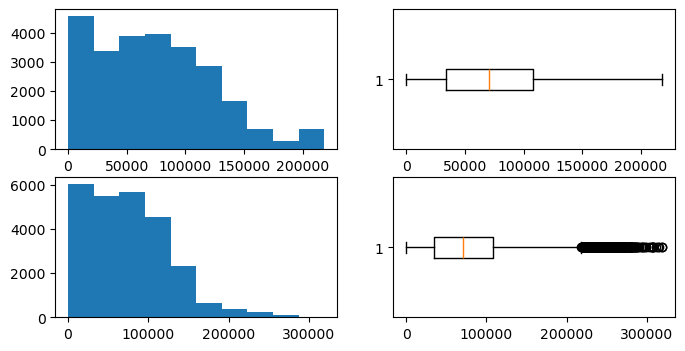

In [44]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage2'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage2'],vert=False)
plt.subplot(2,2,3).hist(wage_data)
plt.subplot(2,2,4).boxplot(wage_data,vert=False)